In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets  import  load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, LeaveOneOut,StratifiedKFold
import random
random.seed(1000)

In [34]:
palu=pd.read_excel('C:\\Users\\ASUS\\Documents\\these\\code_these-master\\palu_impute001.xlsx')
paluu=pd.DataFrame(palu, columns = ['TEMPERATURE', 'S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI',
                                    'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 
                                    'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE'])

# Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
X = paluu
y = palu['Diagnostic']
X1_train, MX_test, y1_train, My_test = train_test_split(X, y, random_state=0)

#Suréchantillonnage avec l'algorithme SMOTE
X1 = paluu
y1 =palu['Diagnostic']
y1= pd.DataFrame(y1)

In [35]:
import imblearn
Re= SMOTE(random_state=0)
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
columns = X1_train.columns
Re_data_X1,Re_data_y1=Re.fit_sample(X1_train, y1_train)
Re_data_X1 = pd.DataFrame(data=Re_data_X1 ,columns= columns)

In [36]:
#Nous séparons notre jeu données palu en deux parties. Une partie pour entrainer X_train et un partie pour tester X_test
#Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
X_train =Re_data_X1
y_train=Re_data_y1
#y_train= pd.DataFrame(Re_data_y1)

(array([15349.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15349.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

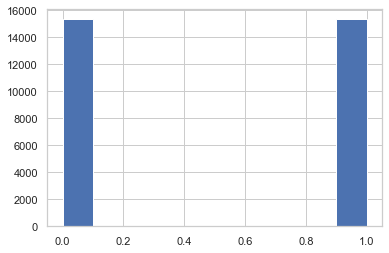

In [37]:
plt.hist(y_train)

In [38]:
X_train.shape

(30698, 13)

In [39]:
y_train.shape

(30698,)

In [40]:
# Les differentes methodes pour faire une validation croisée(Cross Validation)
cv=KFold(5,random_state=0)
cv1= LeaveOneOut()
cv2=StratifiedKFold(5) 

# Decision Tree Classifier

best score 0.7795949429954162
best score {'criterion': 'gini', 'max_depth': 14}
best score 0.8341870612786948
[[4310  810]
 [  64   87]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5120
           1       0.10      0.58      0.17       151

    accuracy                           0.83      5271
   macro avg       0.54      0.71      0.54      5271
weighted avg       0.96      0.83      0.89      5271



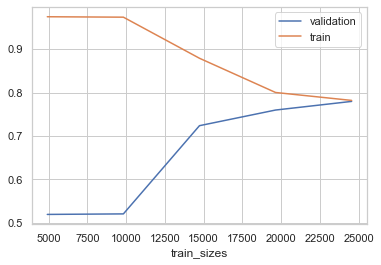

0.761211713576159


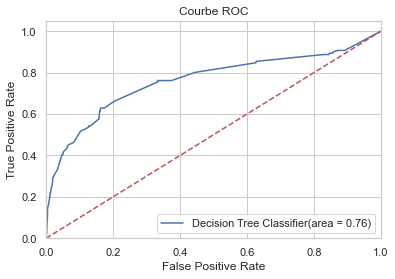

In [25]:
from sklearn.tree import DecisionTreeClassifier
# Chercher les meilleurs paramètres du modele
param_grid={'max_depth': np.arange(12,20), 'criterion':['gini','entropy']}
grid=GridSearchCV( DecisionTreeClassifier(),param_grid, cv=cv2)
grid.fit(X_train,y_train)

#Afficher le meilleur score
print('best score',grid.best_score_)
# Afficher les meilleurs parametres
print('best score',grid.best_params_)
# Recuperer le meilleur modele fourni 
model=grid.best_estimator_
print('best score',model.score(MX_test,My_test))


# Afficher la matrice de confusion
print(confusion_matrix(My_test, model.predict(MX_test)))  
# Afficher le rapport de la classification
print(classification_report(My_test,model.predict(MX_test)))


# Tracer les courbes d'apprentissages: Veci permet de verifier s'il y a surapprentissage ou apprentissage
N, train_score, val_score=learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0,5), cv=5)
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model.predict_proba(MX_test)[:,1]
# Calculer l'air sous la courbe
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
# Tracer la courbe roc
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

best score 0.7800835688737515
best score {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 100}
best score 0.8343767785998861
[[4308  812]
 [  61   90]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5120
           1       0.10      0.60      0.17       151

    accuracy                           0.83      5271
   macro avg       0.54      0.72      0.54      5271
weighted avg       0.96      0.83      0.89      5271

0.7734795374586092


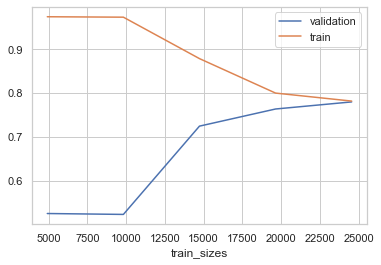

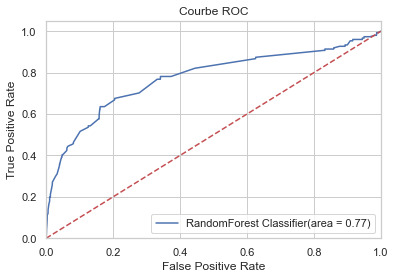

In [10]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth': np.arange(14,20), 'criterion':['gini','entropy'],'n_estimators':[10,50,100, 200, 300,400]}
grid=GridSearchCV( RandomForestClassifier(),param_grid, cv=cv2)
grid.fit(X_train,y_train)

grid1=grid
print('best score',grid1.best_score_)
print('best score',grid1.best_params_)
model1=grid1.best_estimator_
print('best score',model1.score(MX_test,My_test))

N, train_score, val_score=learning_curve(model1, X_train, y_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()


print(confusion_matrix(My_test, model1.predict(MX_test)))  
print(classification_report(My_test,model1.predict(MX_test)))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model1.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression

best score 0.7685518867198713
best score {'max_iter': 10, 'solver': 'newton-cg'}
best score 0.7835325365205843
[[4016 1104]
 [  37  114]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.88      5120
           1       0.09      0.75      0.17       151

    accuracy                           0.78      5271
   macro avg       0.54      0.77      0.52      5271
weighted avg       0.97      0.78      0.86      5271

0.8381150403559602


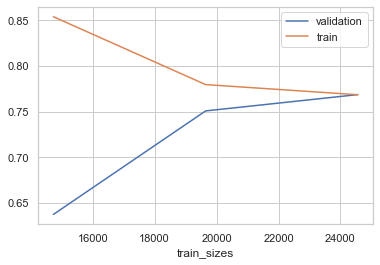

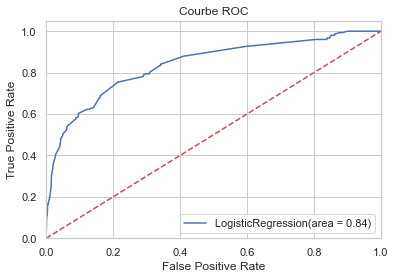

In [26]:
from sklearn.linear_model import LogisticRegression
rf= LogisticRegression()
from sklearn.linear_model import LogisticRegression
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[10, 100,500,1000, 2000, 3000,4000]}
grid2=GridSearchCV( LogisticRegression(),param_grid, cv=StratifiedKFold(5)  )
grid2.fit(X_train,y_train)
print('best score',grid2.best_score_)
print('best score',grid2.best_params_)
model2=grid2.best_estimator_
print('best score',model2.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model2, X_train, y_train, train_sizes=np.linspace(0.2, 1.0,5), cv=StratifiedKFold(5)  )
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()
print(confusion_matrix(My_test, model2.predict(MX_test)))  
print(classification_report(My_test,model2.predict(MX_test)))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model2.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='LogisticRegression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Naive Bays

best score 0.7681935699190257
best score {'var_smoothing': 0.1}
best score 0.8186302409409979
[[4208  912]
 [  44  107]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      5120
           1       0.11      0.71      0.18       151

    accuracy                           0.82      5271
   macro avg       0.55      0.77      0.54      5271
weighted avg       0.96      0.82      0.88      5271

0.8402505432533112


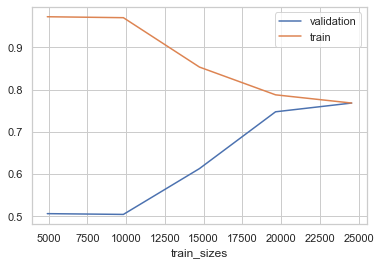

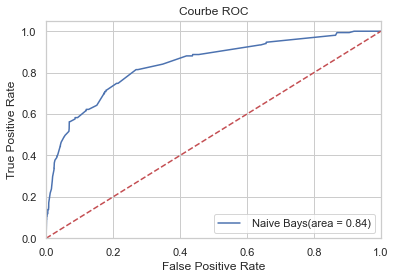

In [28]:
from sklearn.naive_bayes import GaussianNB  
param_grid={'var_smoothing': np.linspace(0.1,1,10)}
grid3=GridSearchCV( GaussianNB(),param_grid, cv=StratifiedKFold(5)  )
grid3.fit(X_train,y_train)


print('best score',grid3.best_score_)
print('best score',grid3.best_params_)
model3=grid3.best_estimator_
print('best score',model3.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model3, X_train, y_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

print(confusion_matrix(My_test, model3.predict(MX_test)))  
print(classification_report(My_test,model3.predict(MX_test)))


y_pred=model3.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=' Naive Bays(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# SVM avec kernel

best score 0.7495602844631403
best score {'kernel': 'linear'}
best score 0.8561942705369
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      5120
           1       0.12      0.62      0.20       151

    accuracy                           0.86      5271
   macro avg       0.55      0.74      0.56      5271
weighted avg       0.96      0.86      0.90      5271

0.7980927928394039


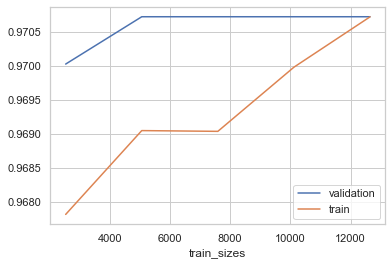

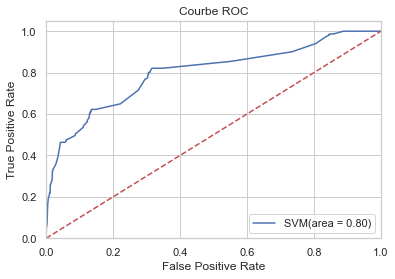

In [29]:
from sklearn.svm import SVC  
param_grid={'kernel':['rbf','linear','sigmoid']}
grid4=GridSearchCV(SVC(probability=True),param_grid, cv=cv2)
grid4.fit(X_train,y_train)
print('best score',grid4.best_score_)
print('best score',grid4.best_params_)
model4=grid4.best_estimator_
print('best score',model4.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model4, X_train, y_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

# print(confusion_matrix(My_test, model4.predict(MX_test)))  
print(classification_report(My_test,model4.predict(MX_test)))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model4.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# ANN

best score 0.7782918628324382
best score {'max_iter': 400}
best score 0.8322898880667805
[[4289  831]
 [  53   98]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5120
           1       0.11      0.65      0.18       151

    accuracy                           0.83      5271
   macro avg       0.55      0.74      0.54      5271
weighted avg       0.96      0.83      0.89      5271

0.794641840852649


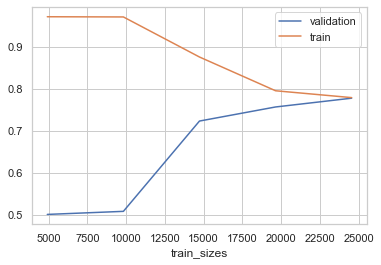

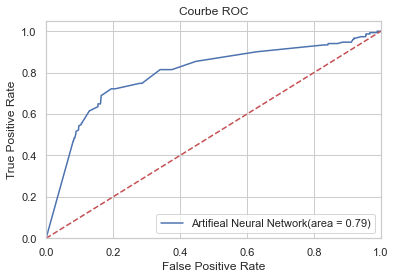

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import random
random.seed(1000)
scaler = StandardScaler()
scaler.fit(X_train)
p_train = scaler.transform(X_train)
p_test = scaler.transform(MX_test)


param_grid={'max_iter':[10,50,100, 200, 300,400]}
grid5=GridSearchCV(MLPClassifier(hidden_layer_sizes=(13,13,3)),param_grid, cv=cv2)
grid5.fit(p_train,y_train)
print('best score',grid5.best_score_)
print('best score',grid5.best_params_)
model5=grid5.best_estimator_
print('best score',model5.score(p_test,My_test))

N, train_score, val_score=learning_curve(model5, p_train, y_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()


print(confusion_matrix(My_test, model5.predict(p_test)))  
print(classification_report(My_test,model5.predict(p_test)))



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model5.predict_proba(p_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Artifieal Neural Network(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()